## This is a Liver Patient Identification Data Set. The target is to identify whether the patient has an anomaly or abnormal functioning of the liver.

In [1]:
# Let's start with importing libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Common Model Helpers
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data Collection

In [3]:
# Loading the Data
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', header = None)

In [4]:
# Call the Dataframe
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# Renaming the data columns
data.rename(columns={0:'Age',1:'Gender',2:'Total_Bilirubin',3:'Direct_Bilirubin',4:'Alkaline_Phosphatase',5:'Alamine_Aminotransferase',6:'Aspartate_Aminotransferase',
                     7:'Total_Proteins',8:'Albumin',9:'Albumin_and_Globulin_Ratio',10:'Dataset'}, inplace=True)

# Exploratory Data Analysis and Preprocessing

- Exploring Data
- Preprocessing and Cleaning
  - Handle missing values
  - Handling Outliers
  - Handling Skewness
  - Handling categorical data
  - Feature Engineering


### Exploring Data

In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Handling missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphatase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### The Column Albumin_and_Globulin_Ratio has some missing values in it.

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

#### As Albumin_and_Globulin_Ratio has 4 missing values in it, we will fill those missing values with mean of the coumn.

In [10]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [11]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Domain Analysis

**Total Bilirubin**: This is blood test that measures the amount of substance called bilirubin.
    The test is used to find out how well your liver is working. It is often part of panel of 
    tests that measure liver function. 
    Bilirubin is an orange-yellow pigment that occurs normally when part of your red blodd cells 
    break down. Your liver takes the bilirubin from your blood and changes its chemical make-up so 
    that most of it is passed through your poop as bile.
    A small amount of bilirubin in your blood is normal, but a high level may be a sign of liver 
    disease.
    
**Direct Bilirubin**: Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is       called direct, or conjugated bilirubin. Bilirubin not attached to glucuronic acid is called       
    indirect, or unconjugated bilirubin. All the bilirubin in blood together is called total 
    bilirubin.

**Alakaline_Phosphatase**: Alkaline Phosphatase(ALP) is an enzyme in a person's blood that helps       break down proteins. The body uses ALP for a wide range of processes, and it plays a 
  particularly important role in liver function and bone development. Using a ALP test, it is possible   to measure how much of this enzyme is circulating in a person's blood.
   
**Alamine_Aminotransferase**: First of all it is "Alanine" and not "Alamine". Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney. It was originally referred to as serum glutamic pyruvic transaminase (SGPT). Normally, a low level of ALT exists in the serum. ALT is increased with liver damage and is used to screen for and/or monitor liver disease. Alanine aminotransferase (ALT) is usually measured concurrently with AST as part of a liver function panel to determine the source of organ damage.

**Aspertate_Aminotransferase**: AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.

**Total_Protein**: Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body. It's used as part of your routine health checkup. It may also be used if you have unexpected weight loss, fatigue, or the symptoms of a kidney or liver disease.

**Albumin**: Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. It is also carries various substances throughout your body, including hormones, vitamins, and enzymes. Low albumin levels can indicate a problem with your liver or kidneys.

**Albumin_and_Globulin_Ratio**: The Albumin to Globulin ratio (A:G) is the ratio of albumin present in serum in relation to the amount of globulin. The ratio can be interpreted only in light of the total protein concentration. Very generally speaking, the normal ratio in most species approximates 1:1.

**Dataset**: This is labelled incorrectly. It should be "Liver_Disease" indicating that the patient has liver disease or not. 

## Handling Outliers and Categorical Data

In [12]:
# Renaming again as per Domain Analysis
data.rename(columns={'Alamine_Aminotransferase':'Alanine_Aminotransferase','Dataset':'Liver_Disease'}, inplace=True)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [13]:
# Checking any duplicate values
data.duplicated().sum()

13

In [14]:
# Removing duplicate values
data = data.drop_duplicates()
print(data.shape)

(570, 11)


In [15]:
# Changing the values in Liver_Disease column
data['Liver_Disease']=data['Liver_Disease'] - 1

# Converting Gender column into categorical data
# Label Male as 1 and Female as 0
def partition(x):
    if x == 'Male':
        return 1
    return 0

data['Gender'] = data['Gender'].map(partition)

#### Here in 'Liver_Disease' 0 indicates that person has liver disease or unhealthy and 1 represents that the person is healthy.

In [16]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


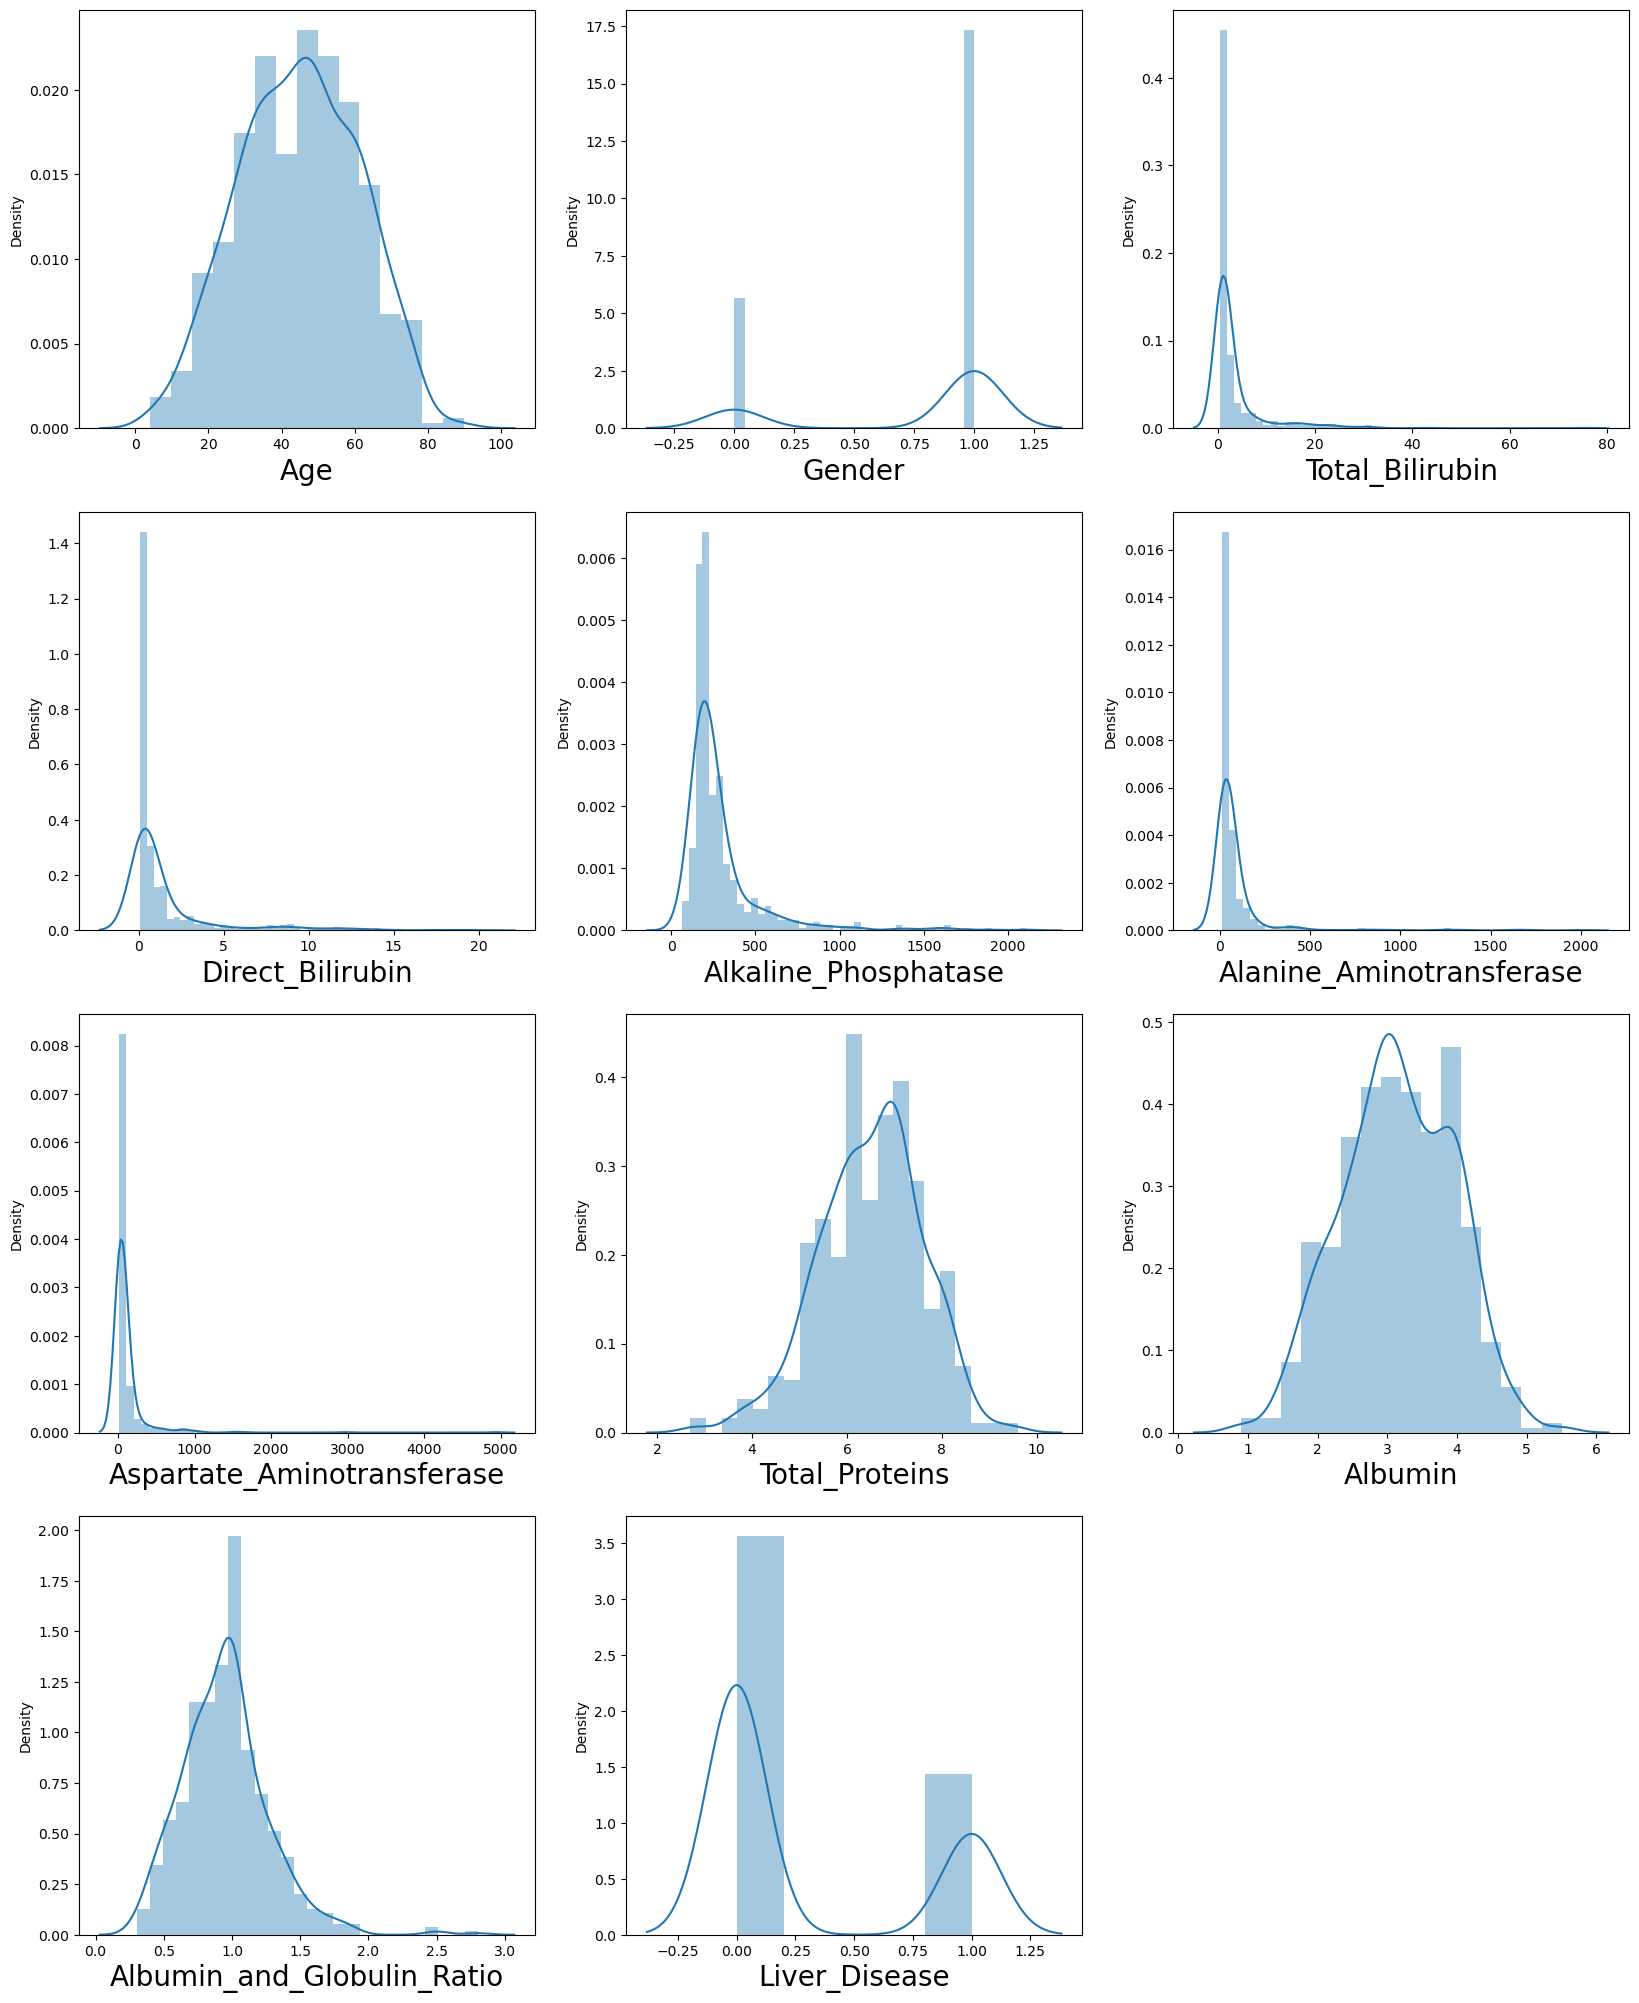

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=11 :# as there are 11 columns in the data
        ax = plt.subplot(4,3,plotnumber)# plotting 11 graphs (4-rows,3-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [18]:
from scipy.stats import skew

In [19]:
data.skew()

Age                           -0.046597
Gender                        -1.185073
Total_Bilirubin                4.869459
Direct_Bilirubin               3.187685
Alkaline_Phosphatase           3.728405
Alanine_Aminotransferase       6.695054
Aspartate_Aminotransferase    10.559418
Total_Proteins                -0.310929
Albumin                       -0.060829
Albumin_and_Globulin_Ratio     1.004870
Liver_Disease                  0.940320
dtype: float64

In [20]:
# save skewed features
skewed_cols = ['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphatase','Alanine_Aminotransferase',
              'Albumin_and_Globulin_Ratio']

In [21]:
# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    data[c] = data[c].apply('log1p')

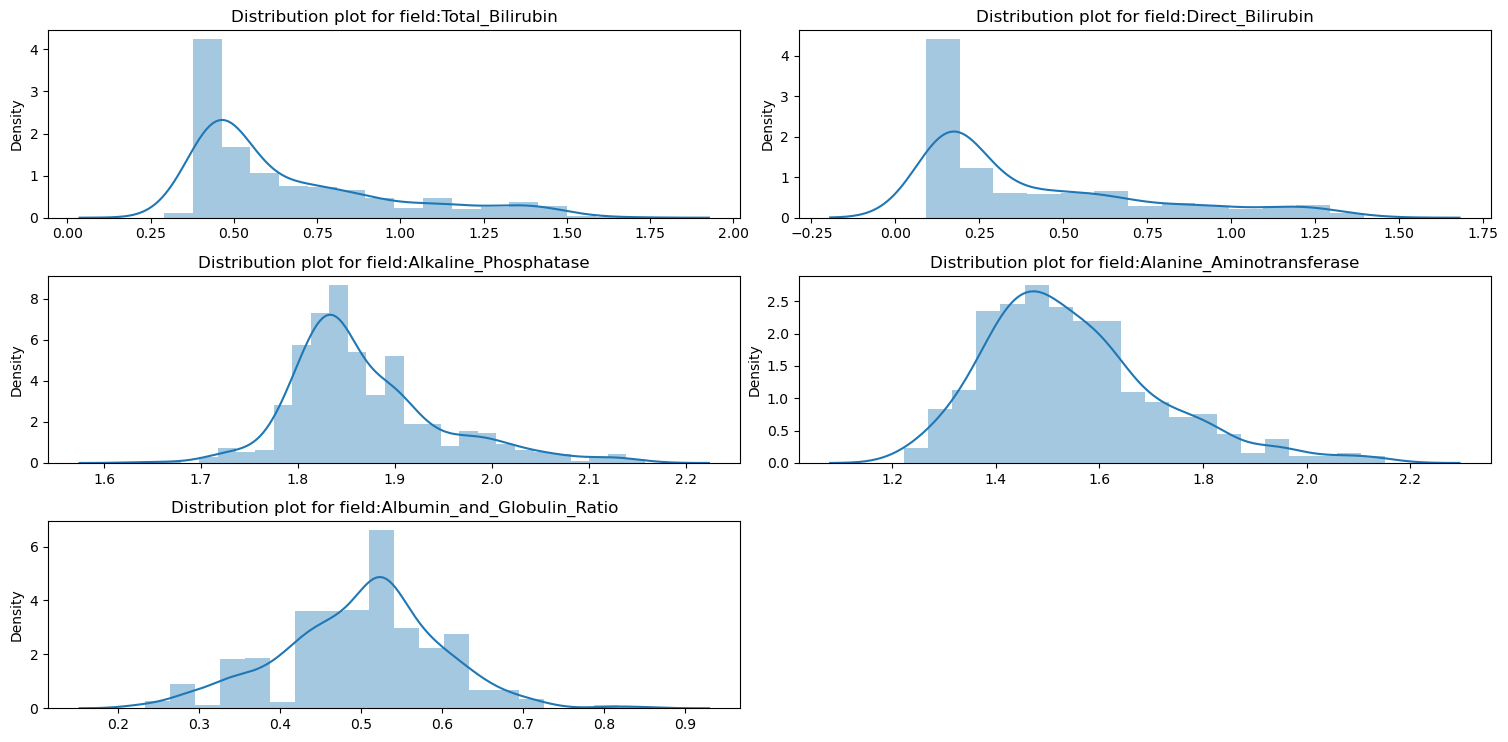

In [22]:
# Next check & fix strongly skewed features
# apply log1p transform
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.distplot(data[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

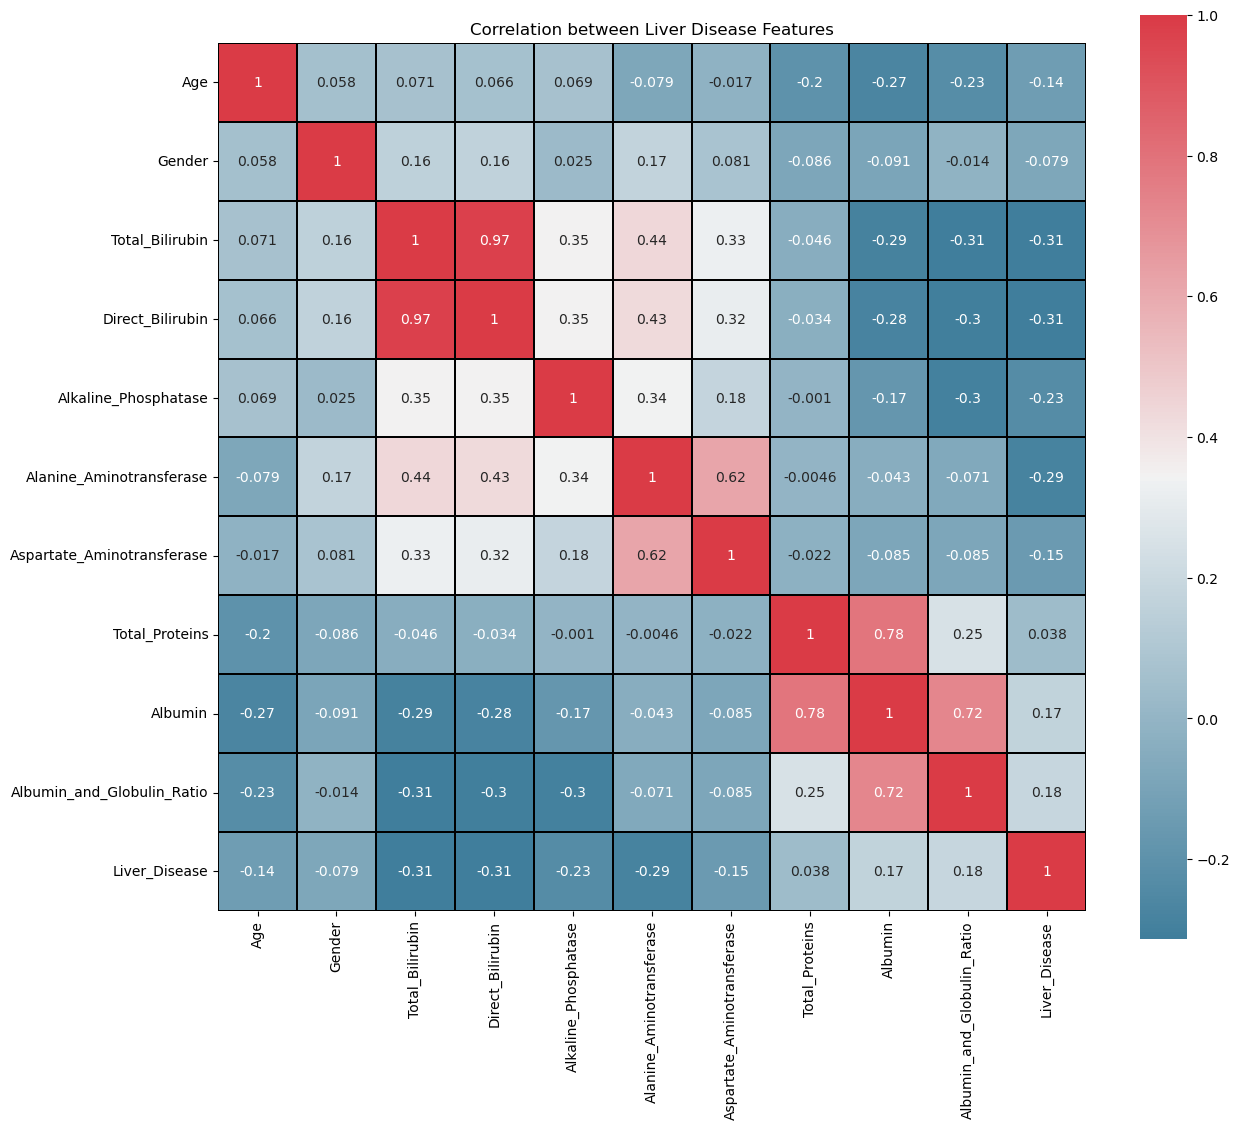

In [23]:
plt.subplots(figsize=(14,12))
colormap=sns.diverging_palette(230,10, as_cmap=True)
sns.heatmap(data.corr(),
            linewidth=0.2,
            linecolor='black',vmax=1.0,square=True,cmap=colormap,annot=True)
plt.title('Correlation between Liver Disease Features')
plt.show()


In [24]:
X = data[['Age','Gender', 'Total_Bilirubin', 
        'Direct_Bilirubin',
        'Alkaline_Phosphatase',
        'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y = data['Liver_Disease']

Text(0, 0.5, 'Albumin (g/dL)')

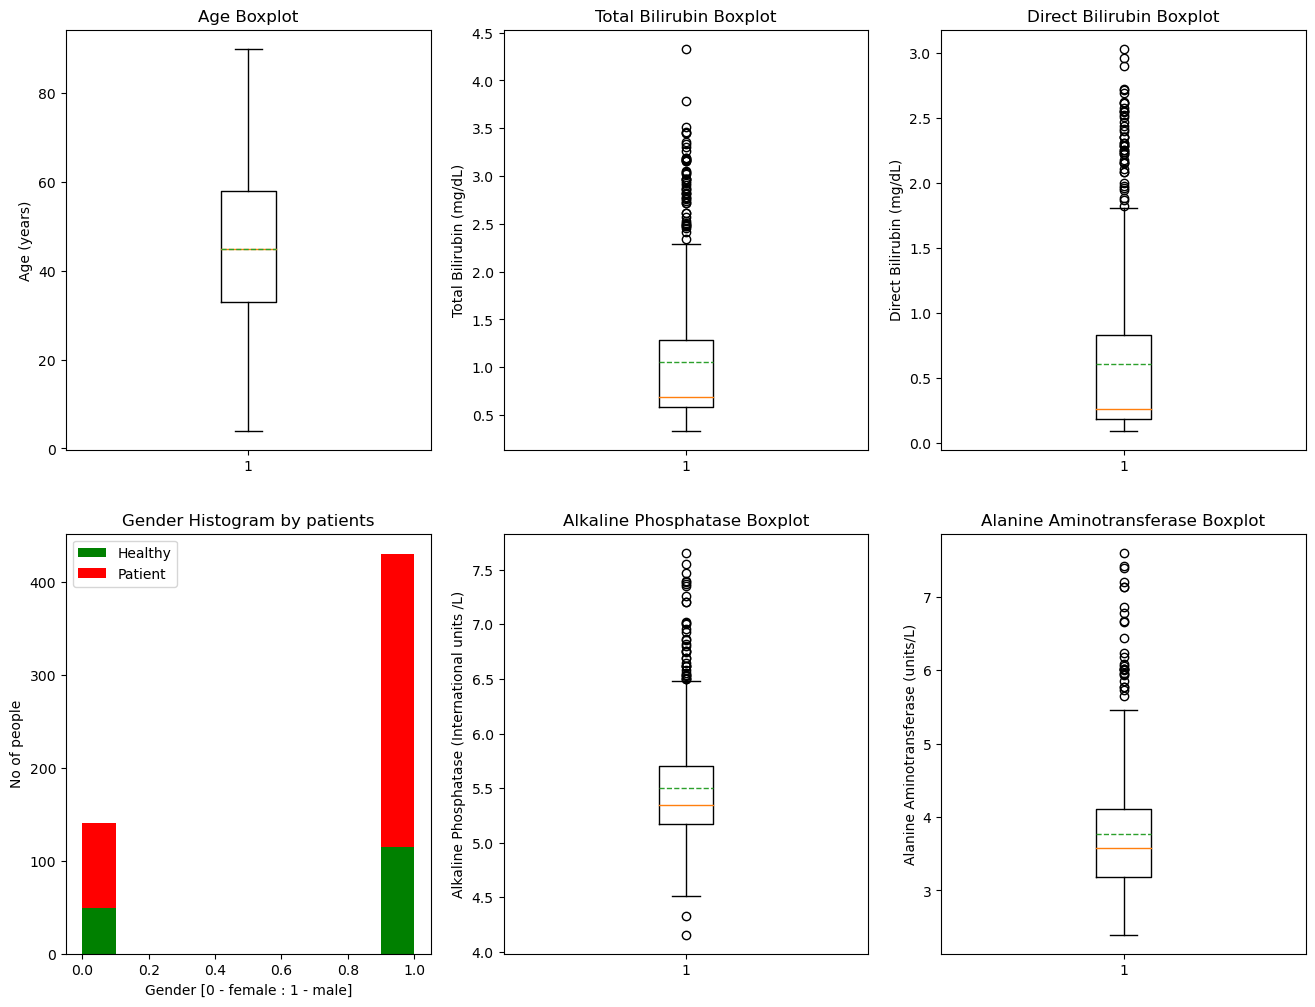

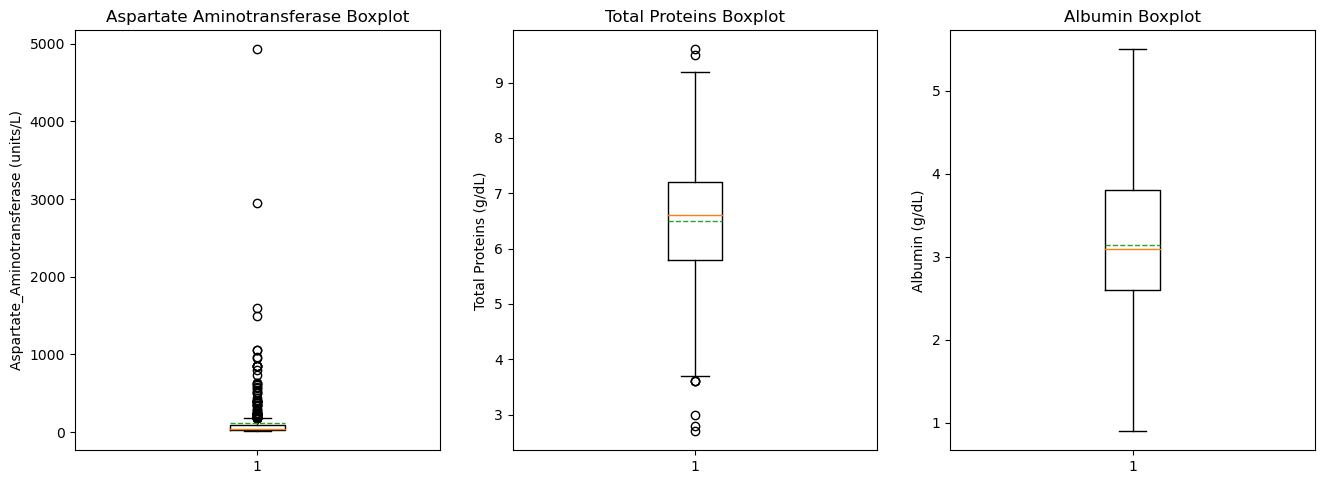

In [25]:
# Plotting the box plots 
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x = X['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (years)')

plt.subplot(232)
plt.boxplot(X['Total_Bilirubin'], showmeans = True, meanline = True)
plt.title('Total Bilirubin Boxplot')
plt.ylabel('Total Bilirubin (mg/dL)')

plt.subplot(233)
plt.boxplot(X['Direct_Bilirubin'], showmeans = True, meanline = True)
plt.title('Direct Bilirubin Boxplot')
plt.ylabel('Direct Bilirubin (mg/dL)')

plt.subplot(234)
plt.hist(x = [X[y==1]['Gender'], X[y ==0]['Gender']], 
         stacked=True, color = ['g','r'],label = ['Healthy','Patient'])
plt.title('Gender Histogram by patients')
plt.xlabel('Gender [0 - female : 1 - male]')
plt.ylabel('No of people')
plt.legend()

plt.subplot(235)
plt.boxplot(x = X['Alkaline_Phosphatase'], showmeans = True, meanline = True)
plt.title('Alkaline Phosphatase Boxplot')
plt.ylabel('Alkaline Phosphatase (International units /L)')

plt.subplot(236)
plt.boxplot(X['Alanine_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase Boxplot')
plt.ylabel('Alanine Aminotransferase (units/L)')

plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(X['Aspartate_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Aspartate Aminotransferase Boxplot')
plt.ylabel('Aspartate_Aminotransferase (units/L)')


plt.subplot(232)
plt.boxplot(X['Total_Proteins'], showmeans = True, meanline = True)
plt.title('Total Proteins Boxplot')
plt.ylabel('Total Proteins (g/dL)')

plt.subplot(233)
plt.boxplot(X['Albumin'], showmeans = True, meanline = True)
plt.title('Albumin Boxplot')
plt.ylabel('Albumin (g/dL)')

In [26]:
# For Outlier detection in Total_Bilirubin Using IQR(Interquartile range) method
from scipy import stats

IQR = stats.iqr(data.Total_Bilirubin, interpolation = 'midpoint')

IQR

0.6931471805599452

In [27]:
# min & max limit calculation
# First quartile(Q1)
Q1 = data.Total_Bilirubin.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Total_Bilirubin.quantile(0.75)
##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [28]:
max_limit

2.320654616301982

In [29]:
len(data.loc[data['Total_Bilirubin'] > max_limit])

51

In [30]:
# Checking for percentage of Outliers
51/583 *100

8.747855917667238

In [31]:
# Outlier check for Direct_Bilirubin 
# Using IQR(Interquartile range) method
from scipy import stats

IQR = stats.iqr(data.Direct_Bilirubin, interpolation = 'midpoint')

IQR

0.6505875661411493

In [32]:
# min & max limit calculation
# First quartile(Q1)
Q1 = data.Direct_Bilirubin.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Direct_Bilirubin.quantile(0.75)
##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [33]:
max_limit

1.808790472146828

In [34]:
len(data.loc[data['Direct_Bilirubin'] > max_limit])

47

In [35]:
# Checking for percentage of Outliers
47/583 *100

8.061749571183533

In [36]:
# Outlier check for Alkaline_Phosphatase
# Using IQR(Interquartile range) method
from scipy import stats

IQR = stats.iqr(data.Alkaline_Phosphatase, interpolation = 'midpoint')

IQR

0.524293840816858

In [37]:
# min & max limit calculation
# First quartile(Q1)
Q1 = data.Alkaline_Phosphatase.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Alkaline_Phosphatase.quantile(0.75)
##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [38]:
len(data.loc[data['Alkaline_Phosphatase'] > max_limit])

36

In [39]:
# Checking for percentage of Outliers
36/583 *100

6.174957118353345

In [40]:
# Outlier check for Alanine_Aminotransferase
# Using IQR(Interquartile range) method
from scipy import stats

IQR = stats.iqr(data.Alanine_Aminotransferase, interpolation = 'midpoint')

IQR

0.9328200338253656

In [41]:
# min & max limit calculation
# First quartile(Q1)
Q1 = data.Alanine_Aminotransferase.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Alanine_Aminotransferase.quantile(0.75)
##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [42]:
len(data.loc[data['Alanine_Aminotransferase'] > max_limit])

27

In [43]:
# Checking for percentage of Outliers
27/583 *100

4.631217838765009

In [44]:
## imputing the outliers as the count is high
data.loc[data['Alanine_Aminotransferase'] > max_limit,'Alanine_Aminotransferase']=np.median(data.Alanine_Aminotransferase)

In [45]:
# Outlier check for Alanine_Aminotransferase
# Using IQR(Interquartile range) method
from scipy import stats

IQR = stats.iqr(data.Aspartate_Aminotransferase, interpolation = 'midpoint')

IQR

61.5

In [46]:
# min & max limit calculation
# First quartile(Q1)
Q1 = data.Aspartate_Aminotransferase.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Aspartate_Aminotransferase.quantile(0.75)
##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [47]:
len(data.loc[data['Aspartate_Aminotransferase'] > max_limit])

66

In [48]:
# Checking for percentage of Outliers
66/583 *100

11.320754716981133

In [49]:
print(data.shape)

(570, 11)


<AxesSubplot:xlabel='Liver_Disease', ylabel='Total_Proteins'>

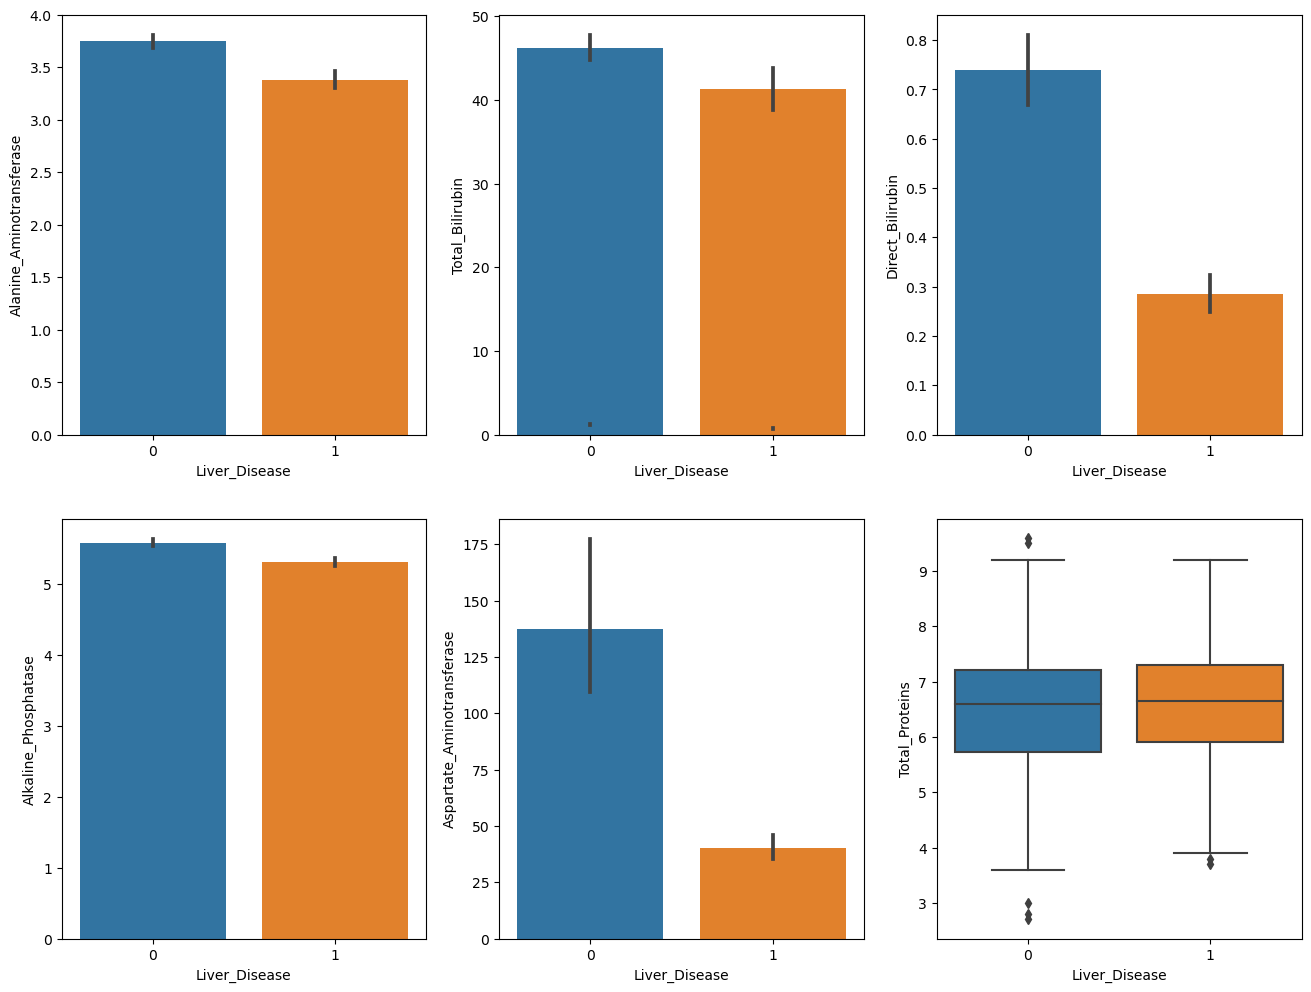

In [50]:
fig, saxis = plt.subplots(2,3,figsize=(16,12))

sns.barplot(y = 'Age', x = 'Liver_Disease', data=data, ax= saxis[0,1])
sns.barplot(y = 'Alanine_Aminotransferase', x = 'Liver_Disease', data=data, ax = saxis[0,0])
sns.barplot(y = 'Total_Bilirubin', x = 'Liver_Disease', data=data, ax = saxis[0,1])
sns.barplot(y = 'Direct_Bilirubin', x = 'Liver_Disease', data=data, ax = saxis[0,2])
sns.barplot(y = 'Alkaline_Phosphatase', x = 'Liver_Disease', data=data, ax = saxis[1,0])
sns.barplot(y = 'Aspartate_Aminotransferase', x = 'Liver_Disease', data=data, ax = saxis[1,1])
sns.boxplot(y = 'Total_Proteins', x = 'Liver_Disease', data=data, ax = saxis[1,2])

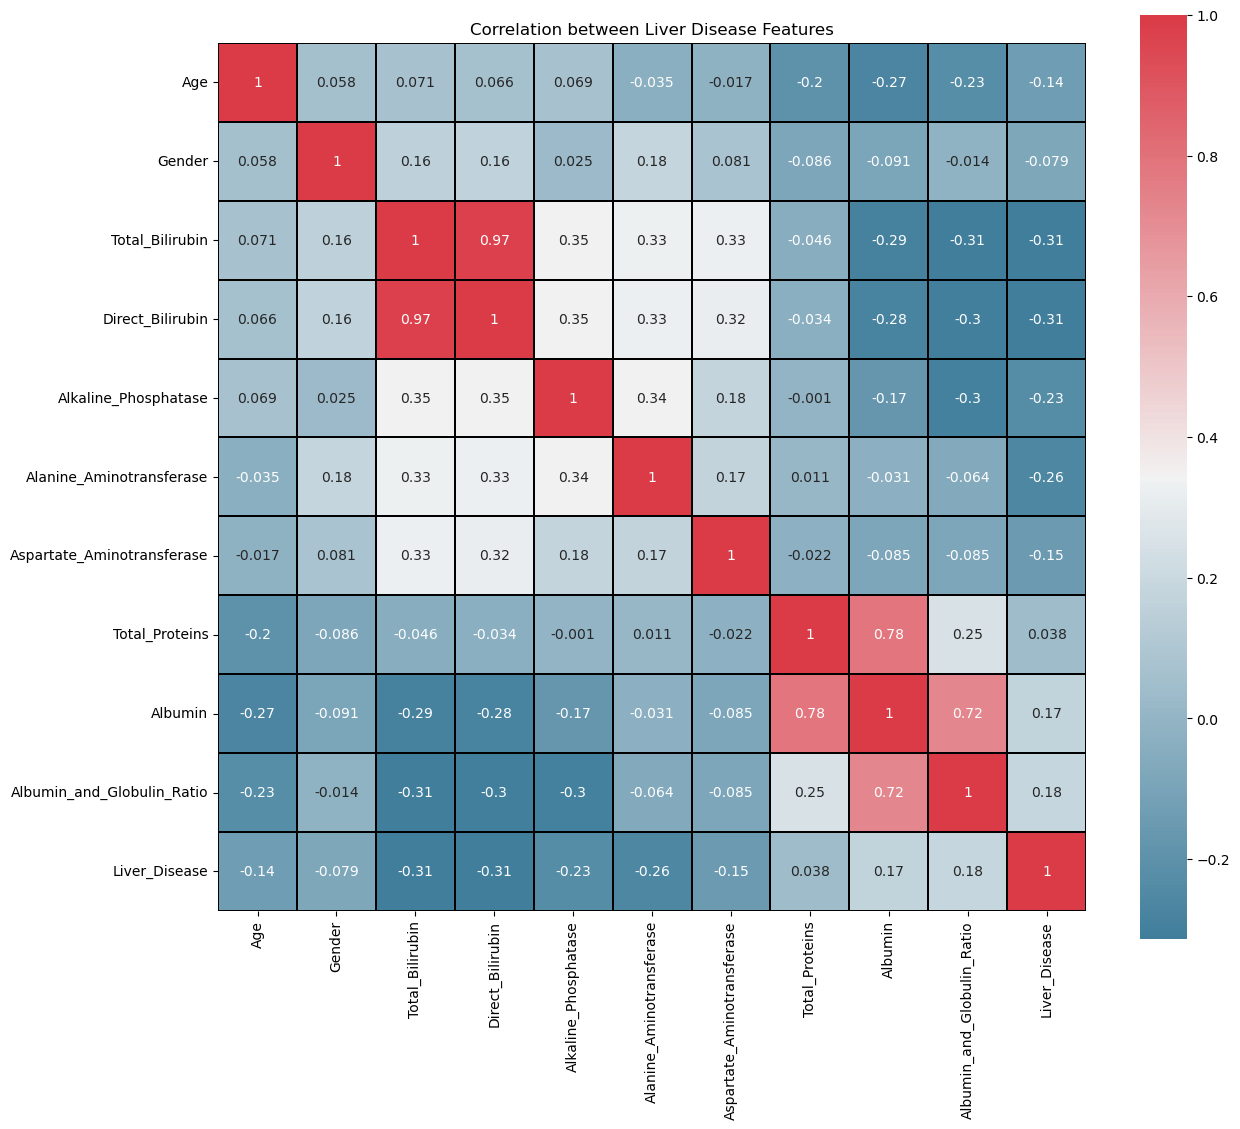

In [51]:
plt.subplots(figsize=(14,12))
colormap=sns.diverging_palette(230,10, as_cmap=True)
sns.heatmap(data.corr(),
            linewidth=0.2,
            linecolor='black',vmax=1.0,square=True,cmap=colormap,annot=True)
plt.title('Correlation between Liver Disease Features')
plt.show()

## Feature Selection

In [52]:
# Dropping Liver_Disease and Gender Column for normalizing the data
X = data.drop(['Gender','Liver_Disease'], axis = 1)
y = data['Liver_Disease']

# Modelling 

- Decision Tree
- Random Forest
- Logistic Regression
- SVM
- KNN
- Naive Bayes

## Split the Data

In [53]:
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print("X_Train Shape: {}".format(X_train.shape))
print("X_Test Shape: {}".format(X_test.shape))
print("y_Train Shape: {}".format(y_train.shape))
print("y_Test Shape: {}".format(y_test.shape))


X_Train Shape: (399, 9)
X_Test Shape: (171, 9)
y_Train Shape: (399,)
y_Test Shape: (171,)


## Random Forest Model

In [54]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [55]:
ran_for = RandomForestClassifier(n_estimators=90, max_depth=8, random_state=0)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.6666666666666666')

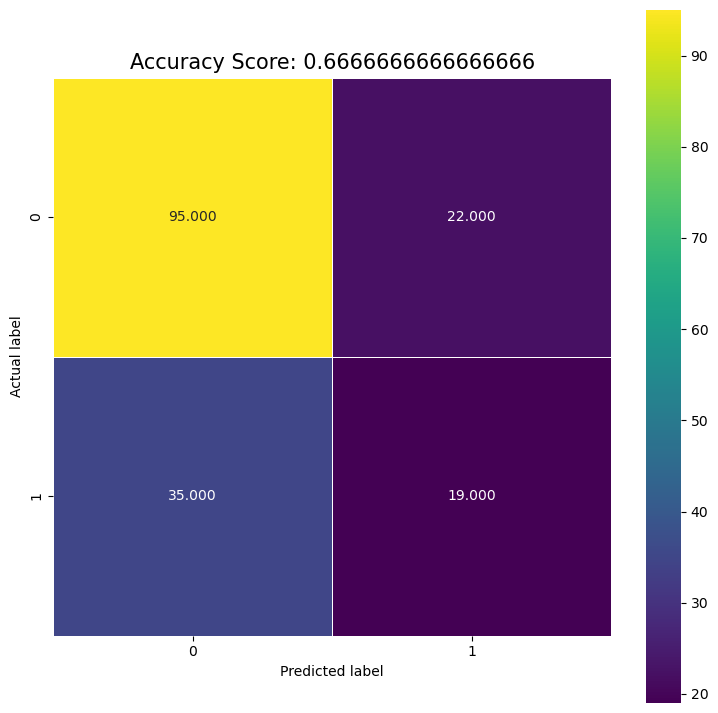

In [56]:
score1 = ran_for.score(X_test, y_test)
cm1 = metrics.confusion_matrix(y_test, y_pred_ran)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15)

In [57]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_ran)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.582


In [58]:
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       117
           1       0.46      0.35      0.40        54

    accuracy                           0.67       171
   macro avg       0.60      0.58      0.58       171
weighted avg       0.65      0.67      0.65       171



## Decision Tree Model

In [59]:
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
    dtree.fit(X_train,y_train)
    y_pred_dtree = dtree.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.6023391812865497')

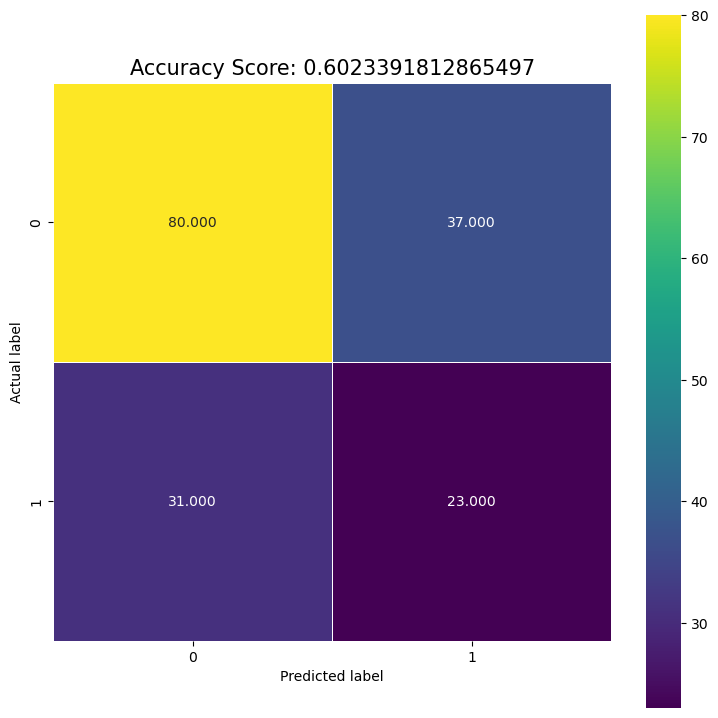

In [60]:
score2 = dtree.score(X_test, y_test)
cm2 = metrics.confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15)

In [60]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_dtree)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.555


In [61]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       117
           1       0.38      0.43      0.40        54

    accuracy                           0.60       171
   macro avg       0.55      0.55      0.55       171
weighted avg       0.61      0.60      0.61       171



## Logistic Regression

In [62]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.7192982456140351')

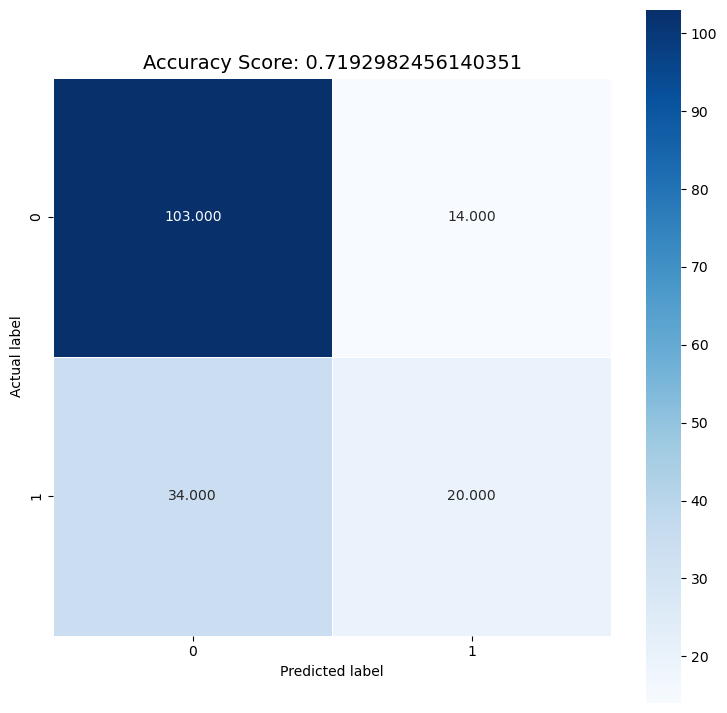

In [63]:
score3 = lr.score(X_test, y_test)
cm3 = metrics.confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score3)
plt.title(all_sample_title, size = 14)

In [64]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_lr)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.625


In [65]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       117
           1       0.59      0.37      0.45        54

    accuracy                           0.72       171
   macro avg       0.67      0.63      0.63       171
weighted avg       0.70      0.72      0.70       171



## SVM Model

In [66]:
from sklearn.svm import SVC

svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)
y_hat=svclassifier.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.6842105263157895')

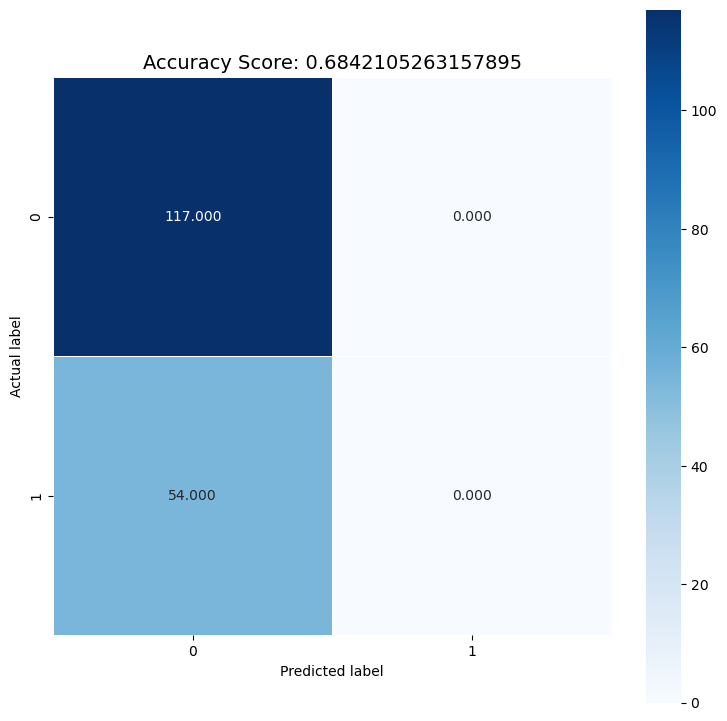

In [67]:
score4 = svclassifier.score(X_test, y_test)
cm4 = metrics.confusion_matrix(y_test, y_hat)
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score4)
plt.title(all_sample_title, size = 14)

In [68]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_hat)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.500


In [69]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       117
           1       0.00      0.00      0.00        54

    accuracy                           0.68       171
   macro avg       0.34      0.50      0.41       171
weighted avg       0.47      0.68      0.56       171



## K - Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.6023391812865497')

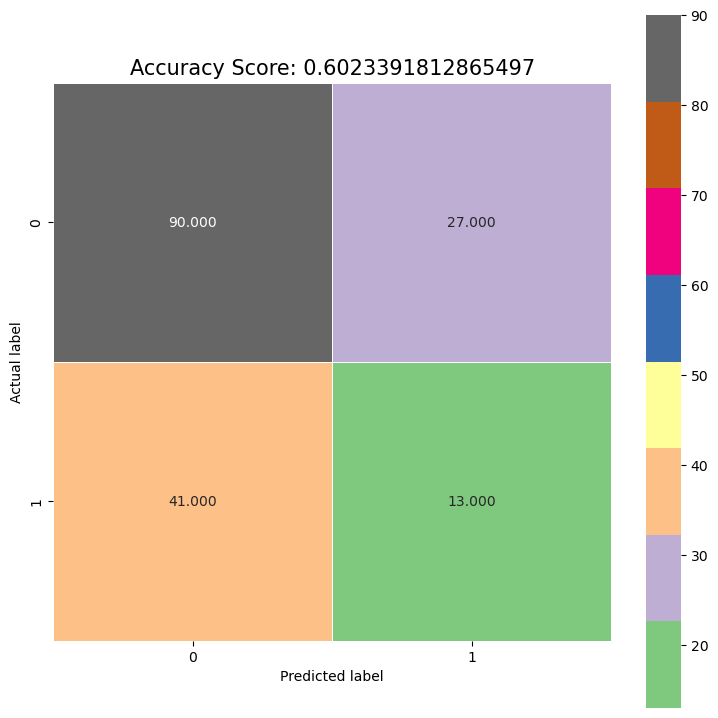

In [72]:
score5 = knn.score(X_test, y_test)
cm5 = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(9,9))
sns.heatmap(cm5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Accent');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score5)
plt.title(all_sample_title, size = 15)

In [71]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_knn)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.505


In [72]:
print(classification_report(y_test,y_pred_knn))


              precision    recall  f1-score   support

           0       0.69      0.77      0.73       117
           1       0.33      0.24      0.28        54

    accuracy                           0.60       171
   macro avg       0.51      0.50      0.50       171
weighted avg       0.57      0.60      0.58       171



## Naive Bayes Model

In [73]:
# Naives Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.5789473684210527')

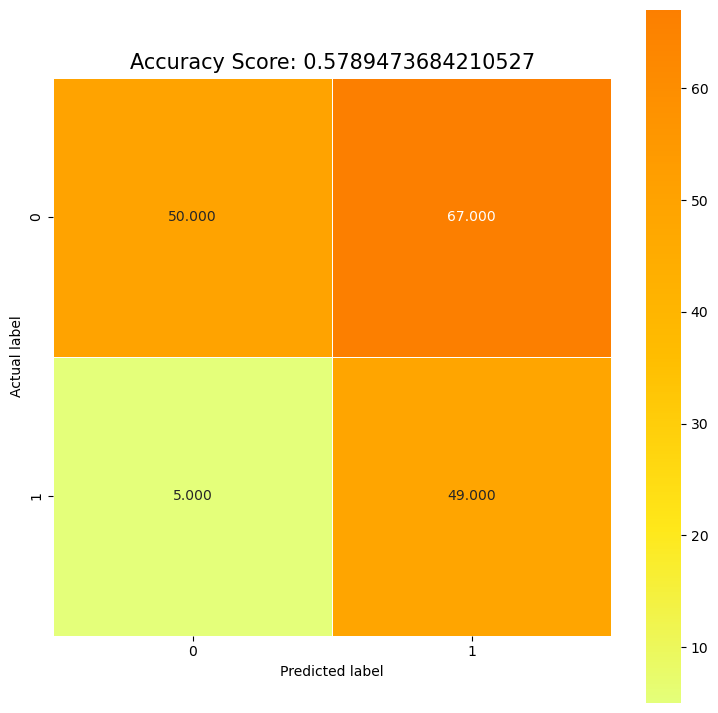

In [74]:
score6 = nb.score(X_test, y_test)
cm6 = metrics.confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(9,9))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score6)
plt.title(all_sample_title, size = 15)

In [75]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_nb)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.667


In [76]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.43      0.58       117
           1       0.42      0.91      0.58        54

    accuracy                           0.58       171
   macro avg       0.67      0.67      0.58       171
weighted avg       0.76      0.58      0.58       171



# Up-sample Minority Class to Handle Imbalanced Data

In [77]:
from tensorflow.keras.utils import normalize
X = normalize(X, axis=1)

In [78]:
from sklearn.utils import resample
print(data['Liver_Disease'].value_counts())

#Separate majority and minority claDisease Statussses
data_majority = data[data['Liver_Disease'] == 0]
data_minority = data[data['Liver_Disease'] == 1]

0    406
1    164
Name: Liver_Disease, dtype: int64


In [79]:
# Upsample minority class and other classes separately
# If not, random samples from combined classes will be duplicated and we run into
#same issue as before, undersampled remians undersampled.
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=406,    # to match average class
                                 random_state=42) # reproducible results


In [80]:
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
print(data_upsampled['Liver_Disease'].value_counts())

0    406
1    406
Name: Liver_Disease, dtype: int64


In [81]:
y_upsampled = data_upsampled['Liver_Disease'].values

#Define the independent variables
X_upsampled = data_upsampled.drop(labels = ["Liver_Disease", "Gender"], axis=1) 
X_upsampled = normalize(X_upsampled, axis=1)

In [82]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, 
                                                                                            y_upsampled, 
                                                                                          test_size=0.2, 
                                                                                            random_state=20)

# Random Forest Model

In [83]:
# Random Forest Model
#Train again with new upsamples data
rf_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
rf_upsampled.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(n_estimators=25, random_state=42)

In [84]:
y_pred_rf_upsampled = rf_upsampled.predict(X_test_upsampled)
y_pred_rf_upsampled

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score

score_rf_upsampled = round(accuracy_score(y_pred_rf_upsampled,y_test_upsampled)*100,2)
print("***** METRICS FOR BALANCED DATA USING UPSAMPLING *****")
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf_upsampled)+" %")

***** METRICS FOR BALANCED DATA USING UPSAMPLING *****
The accuracy score achieved using the Random Forest model is: 84.66 %


Text(0.5, 1.0, 'Accuracy Score: 84.66')

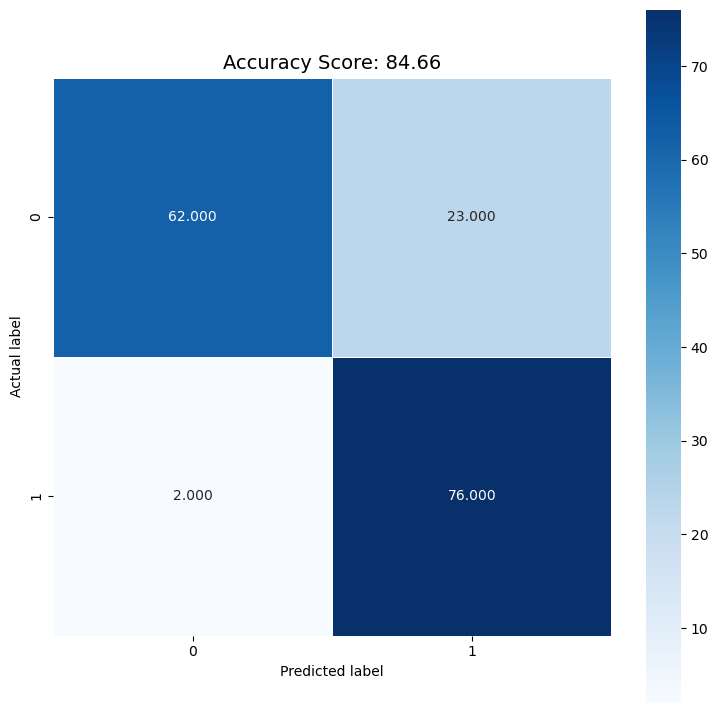

In [86]:
m1 = metrics.confusion_matrix(y_test_upsampled, y_pred_rf_upsampled)
plt.figure(figsize=(9,9))
sns.heatmap(m1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_rf_upsampled)
plt.title(all_sample_title, size = 14)

In [87]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test_upsampled, y_pred_rf_upsampled)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.852


In [88]:
print(classification_report(y_test_upsampled, y_pred_rf_upsampled))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        85
           1       0.77      0.97      0.86        78

    accuracy                           0.85       163
   macro avg       0.87      0.85      0.85       163
weighted avg       0.87      0.85      0.84       163



# Decision Tree Model

In [89]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt_upsampled = DecisionTreeClassifier(random_state=x)
    dt_upsampled.fit(X_train_upsampled,y_train_upsampled)
    y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
    current_accuracy = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

In [90]:
dt_upsampled = DecisionTreeClassifier(random_state=best_x)
dt_upsampled.fit(X_train_upsampled,y_train_upsampled)

DecisionTreeClassifier(random_state=66)

In [91]:
y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
y_pred_dt_upsampled

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [92]:
score_dt_upsampled = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100,2)
print("***** METRICS FOR BALANCED DATA USING UPSAMPLING *****")
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt_upsampled)+" %")

***** METRICS FOR BALANCED DATA USING UPSAMPLING *****
The accuracy score achieved using the Decision Tree model is: 85.89 %


Text(0.5, 1.0, 'Accuracy Score: 85.89')

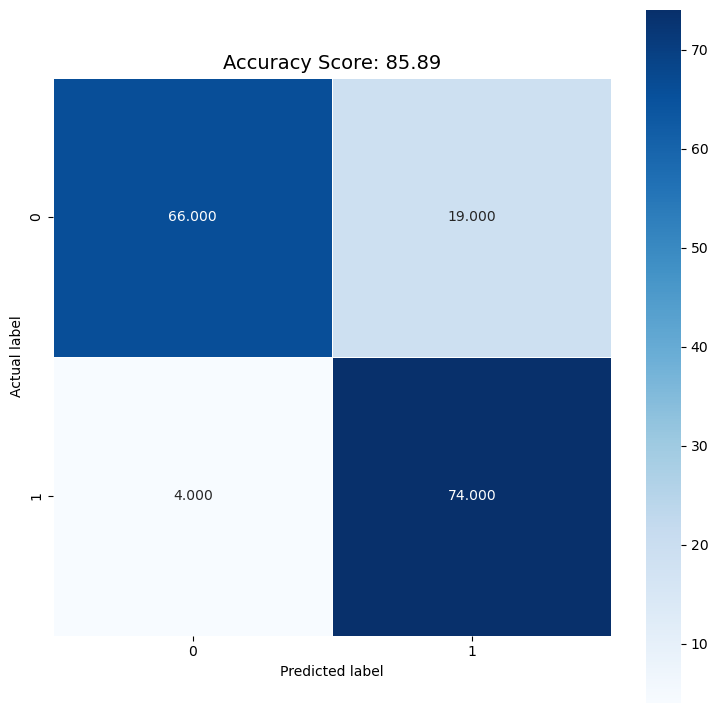

In [93]:
m2 = metrics.confusion_matrix(y_test_upsampled, y_pred_dt_upsampled)
plt.figure(figsize=(9,9))
sns.heatmap(m2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_dt_upsampled)
plt.title(all_sample_title, size = 14)



In [94]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test_upsampled, y_pred_dt_upsampled)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.863


In [95]:
print(classification_report(y_test_upsampled, y_pred_dt_upsampled))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        85
           1       0.80      0.95      0.87        78

    accuracy                           0.86       163
   macro avg       0.87      0.86      0.86       163
weighted avg       0.87      0.86      0.86       163



# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

lr_model_upsampled = LogisticRegression(random_state=42, max_iter = 1000).fit(X_train_upsampled,y_train_upsampled)
lr_model_upsampled 

LogisticRegression(max_iter=1000, random_state=42)

In [97]:
y_pred_lr_upsampled = lr_model_upsampled.predict(X_test_upsampled)
y_pred_lr_upsampled

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [98]:
score_lr_upsampled = round(accuracy_score(y_pred_lr_upsampled,y_test_upsampled)*100,2)
print("***** METRICS FOR BALANCED DATA USING UPSAMPLING *****")
print("The accuracy score achieved using the Logistic Regression model is: "+str(score_lr_upsampled)+" %")

***** METRICS FOR BALANCED DATA USING UPSAMPLING *****
The accuracy score achieved using the Logistic Regression model is: 61.35 %


Text(0.5, 1.0, 'Accuracy Score: 61.35')

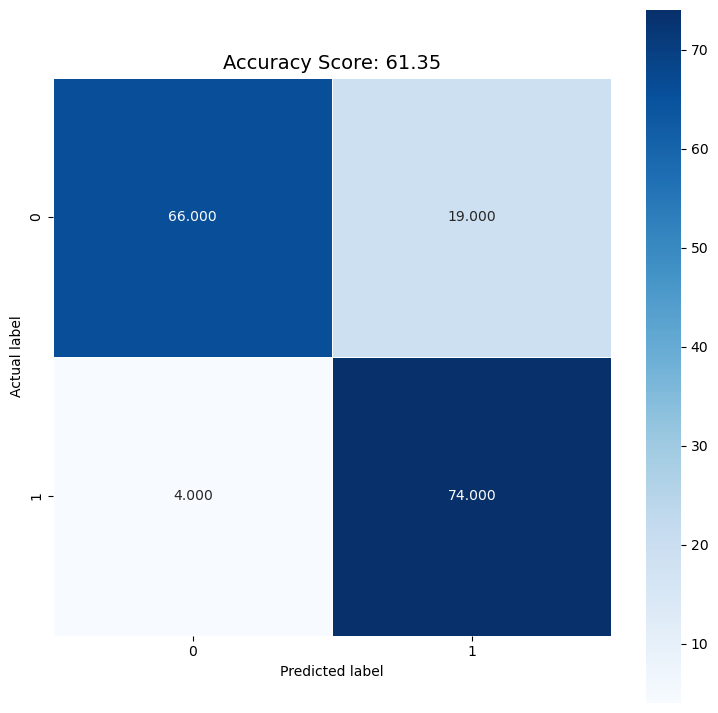

In [99]:
m3 = metrics.confusion_matrix(y_test_upsampled, y_pred_dt_upsampled)
plt.figure(figsize=(9,9))
sns.heatmap(m3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_lr_upsampled)
plt.title(all_sample_title, size = 14)


In [100]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test_upsampled, y_pred_lr_upsampled)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.618


In [101]:
print(classification_report(y_test_upsampled, y_pred_lr_upsampled))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        85
           1       0.58      0.73      0.64        78

    accuracy                           0.61       163
   macro avg       0.62      0.62      0.61       163
weighted avg       0.63      0.61      0.61       163



# SVM Model

In [102]:
from sklearn.svm import SVC

svm_model_upsampled = SVC()
svm_model_upsampled.fit(X_train_upsampled,y_train_upsampled)

SVC()

In [103]:
y_pred_svm_upsampled = svm_model_upsampled.predict(X_test_upsampled)
y_pred_svm_upsampled

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [104]:
score_svm_upsampled = round(accuracy_score(y_pred_svm_upsampled,y_test_upsampled)*100,2)
print("***** METRICS FOR BALANCED DATA USING UPSAMPLING *****")
print("The accuracy score achieved using the SVM model is: "+str(score_svm_upsampled)+" %")

***** METRICS FOR BALANCED DATA USING UPSAMPLING *****
The accuracy score achieved using the SVM model is: 62.58 %


Text(0.5, 1.0, 'Accuracy Score: 62.58')

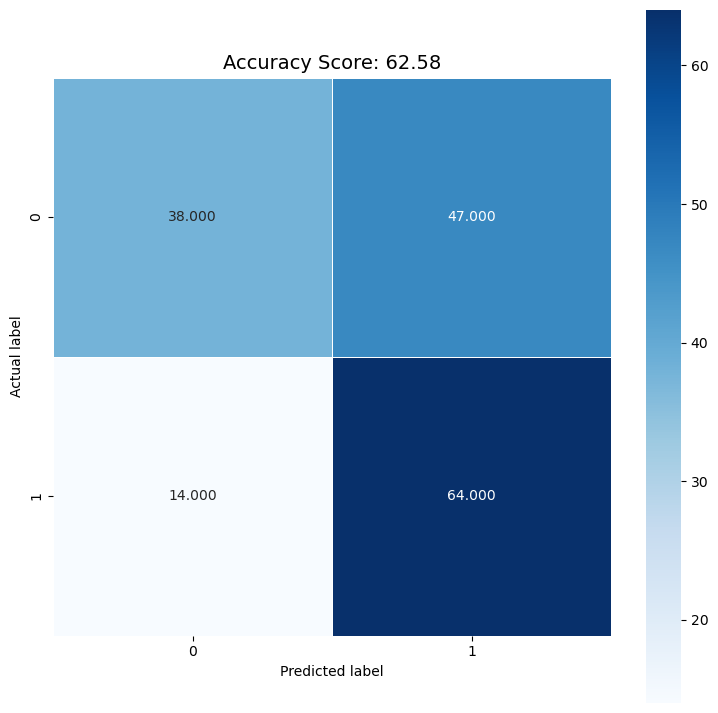

In [105]:
m4 = metrics.confusion_matrix(y_test_upsampled, y_pred_svm_upsampled)
plt.figure(figsize=(9,9))
sns.heatmap(m4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_svm_upsampled)
plt.title(all_sample_title, size = 14)


In [106]:
print(classification_report(y_test_upsampled, y_pred_svm_upsampled))

              precision    recall  f1-score   support

           0       0.73      0.45      0.55        85
           1       0.58      0.82      0.68        78

    accuracy                           0.63       163
   macro avg       0.65      0.63      0.62       163
weighted avg       0.66      0.63      0.61       163



## K - Nearest Neighbors

In [107]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(X_train_upsampled,y_train_upsampled)
y_pred_knn = knn.predict(X_test_upsampled)

In [109]:
score_knn_upsampled = round(accuracy_score(y_pred_knn,y_test_upsampled)*100,2)
print("***** METRICS FOR BALANCED DATA USING UPSAMPLING *****")
print("The accuracy score achieved using the knn model is: "+str(score_knn_upsampled)+" %")

***** METRICS FOR BALANCED DATA USING UPSAMPLING *****
The accuracy score achieved using the knn model is: 70.55 %


In [110]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test_upsampled, y_pred_knn)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.708


Text(0.5, 1.0, 'Accuracy Score: 70.55')

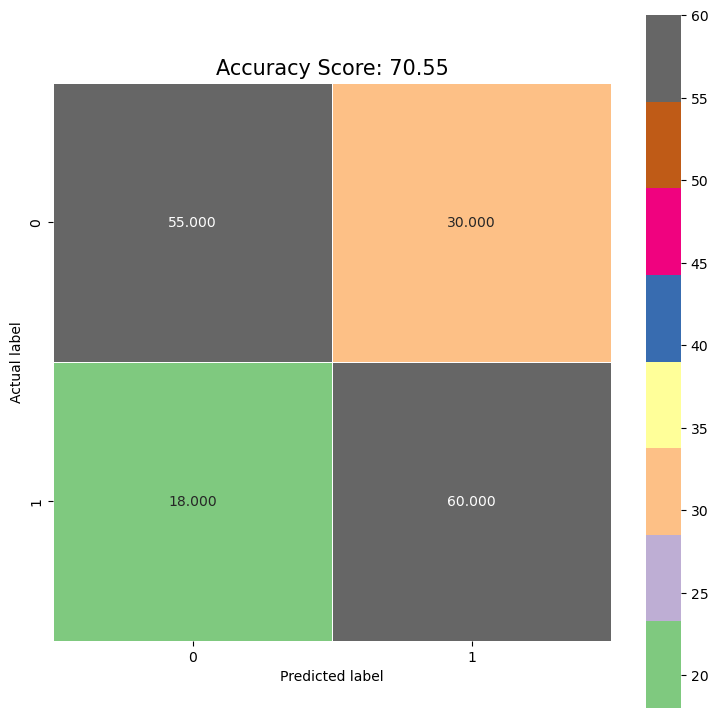

In [111]:
m5 = metrics.confusion_matrix(y_test_upsampled, y_pred_knn)
plt.figure(figsize=(9,9))
sns.heatmap(m5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Accent');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_knn_upsampled)
plt.title(all_sample_title, size = 15)

In [112]:
print(classification_report(y_test_upsampled, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        85
           1       0.67      0.77      0.71        78

    accuracy                           0.71       163
   macro avg       0.71      0.71      0.71       163
weighted avg       0.71      0.71      0.70       163



## Naive Bayes Model

In [113]:
# Naives Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_upsampled,y_train_upsampled)
y_pred_nb = nb.predict(X_test_upsampled)

In [114]:
score_nb_upsampled = round(accuracy_score(y_pred_nb,y_test_upsampled)*100,2)
print("***** METRICS FOR BALANCED DATA USING UPSAMPLING *****")
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb_upsampled)+" %")

***** METRICS FOR BALANCED DATA USING UPSAMPLING *****
The accuracy score achieved using the Naive Bayes model is: 68.71 %


In [115]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test_upsampled, y_pred_nb)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.690


Text(0.5, 1.0, 'Accuracy Score: 68.71')

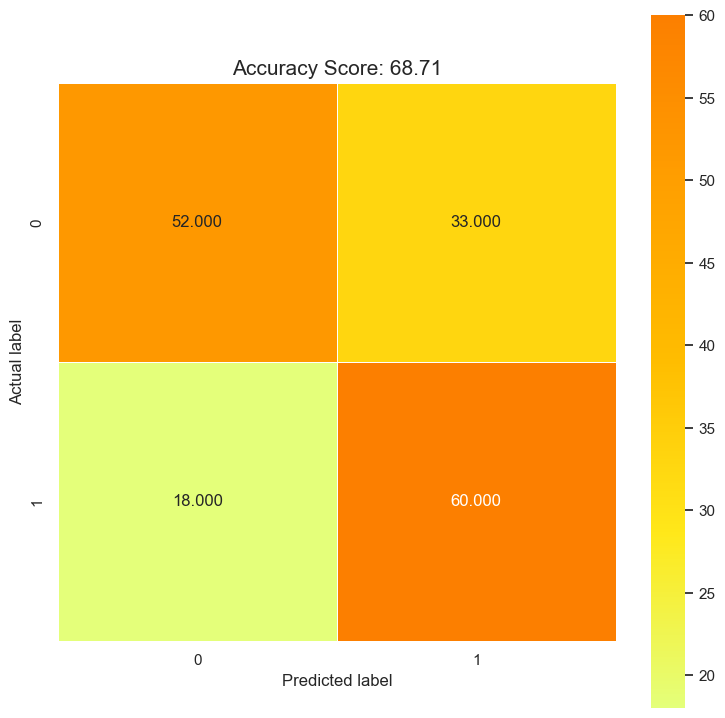

In [121]:
m6 = metrics.confusion_matrix(y_test_upsampled, y_pred_nb)
plt.figure(figsize=(9,9))
sns.heatmap(m6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_nb_upsampled)
plt.title(all_sample_title, size = 15)

In [116]:
print(classification_report(y_test_upsampled, y_pred_nb))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        85
           1       0.65      0.77      0.70        78

    accuracy                           0.69       163
   macro avg       0.69      0.69      0.69       163
weighted avg       0.70      0.69      0.69       163



# Final Score

In [117]:
scores = [score_rf_upsampled,score_dt_upsampled,score_lr_upsampled,score_svm_upsampled,score_knn_upsampled,score_nb_upsampled] #,score_nn]
algorithms = ["Random Forest","Decision Tree","Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Naive Bayes Model"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 84.66 %
The accuracy score achieved using Decision Tree is: 85.89 %
The accuracy score achieved using Logistic Regression is: 61.35 %
The accuracy score achieved using Support Vector Machine is: 62.58 %
The accuracy score achieved using K-Nearest Neighbors is: 70.55 %
The accuracy score achieved using Naive Bayes Model is: 68.71 %


# Comparison of the Accuracy of above Models

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

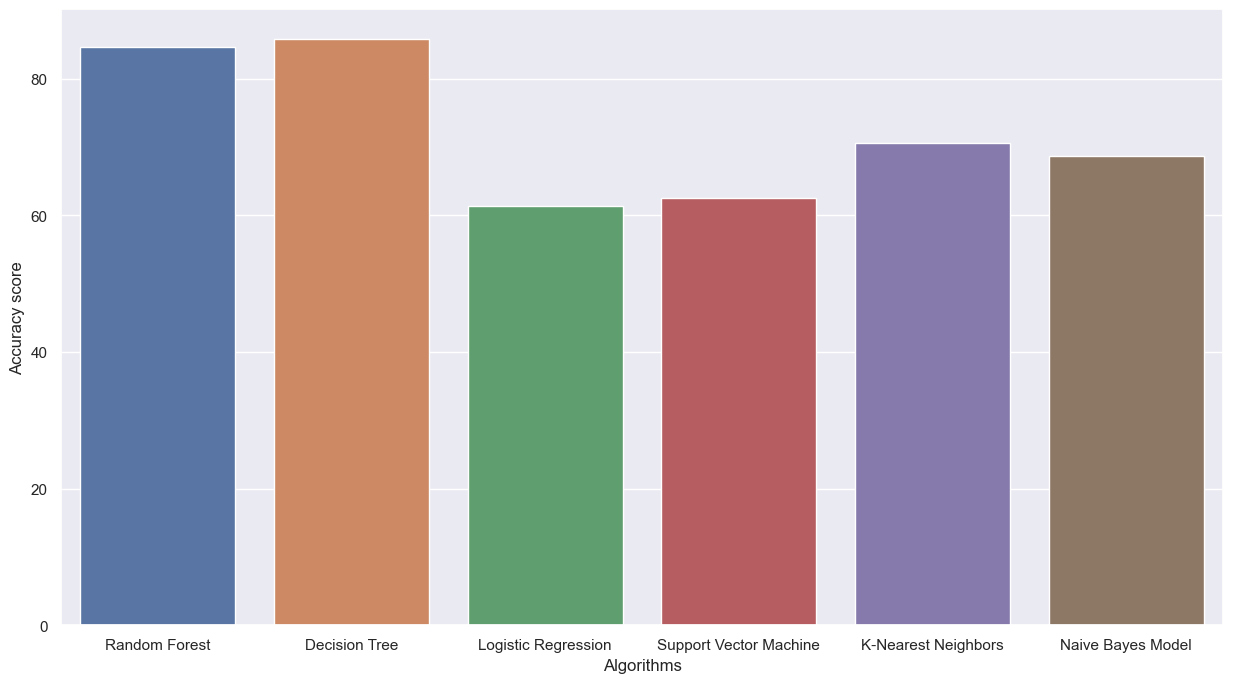

In [118]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# Conclusion

- The comprehensive analysis employed with the machine learning algorithm such as Decision Tree, Random Forest, Logistic Regression, SVM, KNN and Naive Bayes. These algorithms are used to predict the Liver Disease at an early stage.

- These algorithms were evaluated and compared based on performance metrics such as accuracy, precision, recall and F1-score.

- From the analysis 'Decision Tree' performed well than other algorithm with slight variation and it achieved accuracy of 85.89%.

- This comparative analysis will help to predict the liver disease and will benifit in managing the health of the individuals. 